# Importing the Data

In [ ]:
data_path = 'https://archive.ics.uci.edu/static/public/374/appliances+energy+prediction.zip'
! wget $data_path
! unzip appliances+energy+prediction.zip

--2024-07-24 05:40:37--  https://archive.ics.uci.edu/static/public/374/appliances+energy+prediction.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘appliances+energy+prediction.zip’

appliances+energy+p     [   <=>              ]  11.42M  27.4MB/s    in 0.4s    

2024-07-24 05:40:37 (27.4 MB/s) - ‘appliances+energy+prediction.zip’ saved [11979507]

Archive:  appliances+energy+prediction.zip
 extracting: energydata_complete.csv  


In [ ]:
import pandas as pd

file_path = '/content/energydata_complete.csv'

df = pd.read_csv(file_path, sep=',')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    'date': 'timestamp',
    'Appliances': 'energy_appliances',
    'lights': 'energy_lights',
    'T1': 'temp_kitchen',
    'T2': 'temp_living_room',
    'T3': 'temp_laundry_room',
    'T4': 'temp_office_room',
    'T5': 'temp_bathroom',
    'T6': 'temp_outside_north',
    'T7': 'temp_ironing_room',
    'T8': 'temp_teenager_room_2',
    'T9': 'temp_parents_room',
    'RH_1': 'humidity_kitchen',
    'RH_2': 'humidity_living_room',
    'RH_3': 'humidity_laundry_room',
    'RH_4': 'humidity_office_room',
    'RH_5': 'humidity_bathroom',
    'RH_6': 'humidity_outside_north',
    'RH_7': 'humidity_ironing_room',
    'RH_8': 'humidity_teenager_room_2',
    'RH_9': 'humidity_parents_room',
    'Press_mm_hg': 'pressure',
    'Windspeed': 'wind_speed',
    'Visibility': 'visibility',
    'Tdewpoint': 'dew_point_temp',
    'rv1': 'random_variable_1',
    'rv2': 'random_variable_2'
}

In [ ]:
# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Verify the changes
df.head()

,timestamp,energy_appliances,energy_lights,temp_kitchen,humidity_kitchen,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,...,temp_parents_room,humidity_parents_room,T_out,pressure,RH_out,wind_speed,visibility,dew_point_temp,random_variable_1,random_variable_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.shape

(19735, 29)

In [ ]:
df.isnull().sum().sort_values()

timestamp                   0
dew_point_temp              0
visibility                  0
wind_speed                  0
RH_out                      0
pressure                    0
T_out                       0
humidity_parents_room       0
temp_parents_room           0
humidity_teenager_room_2    0
temp_teenager_room_2        0
humidity_ironing_room       0
temp_ironing_room           0
random_variable_1           0
humidity_outside_north      0
humidity_bathroom           0
temp_bathroom               0
humidity_office_room        0
temp_office_room            0
humidity_laundry_room       0
temp_laundry_room           0
humidity_living_room        0
temp_living_room            0
humidity_kitchen            0
temp_kitchen                0
energy_lights               0
energy_appliances           0
temp_outside_north          0
random_variable_2           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 19735 non-null  object 
 1   energy_appliances         19735 non-null  int64  
 2   energy_lights             19735 non-null  int64  
 3   temp_kitchen              19735 non-null  float64
 4   humidity_kitchen          19735 non-null  float64
 5   temp_living_room          19735 non-null  float64
 6   humidity_living_room      19735 non-null  float64
 7   temp_laundry_room         19735 non-null  float64
 8   humidity_laundry_room     19735 non-null  float64
 9   temp_office_room          19735 non-null  float64
 10  humidity_office_room      19735 non-null  float64
 11  temp_bathroom             19735 non-null  float64
 12  humidity_bathroom         19735 non-null  float64
 13  temp_outside_north        19735 non-null  float64
 14  humidi

In [ ]:
df.columns

Index(['timestamp', 'energy_appliances', 'energy_lights', 'temp_kitchen',
       'humidity_kitchen', 'temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'humidity_bathroom',
       'temp_outside_north', 'humidity_outside_north', 'temp_ironing_room',
       'humidity_ironing_room', 'temp_teenager_room_2',
       'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'pressure', 'RH_out', 'wind_speed',
       'visibility', 'dew_point_temp', 'random_variable_1',
       'random_variable_2'],
      dtype='object')

In [ ]:
df.describe()

,energy_appliances,energy_lights,temp_kitchen,humidity_kitchen,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,humidity_office_room,...,temp_parents_room,humidity_parents_room,T_out,pressure,RH_out,wind_speed,visibility,dew_point_temp,random_variable_1,random_variable_2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.columns

Index(['timestamp', 'energy_appliances', 'energy_lights', 'temp_kitchen',
       'humidity_kitchen', 'temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'humidity_bathroom',
       'temp_outside_north', 'humidity_outside_north', 'temp_ironing_room',
       'humidity_ironing_room', 'temp_teenager_room_2',
       'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'pressure', 'RH_out', 'wind_speed',
       'visibility', 'dew_point_temp', 'random_variable_1',
       'random_variable_2'],
      dtype='object')

In [ ]:
df.dtypes

timestamp                    object
energy_appliances             int64
energy_lights                 int64
temp_kitchen                float64
humidity_kitchen            float64
temp_living_room            float64
humidity_living_room        float64
temp_laundry_room           float64
humidity_laundry_room       float64
temp_office_room            float64
humidity_office_room        float64
temp_bathroom               float64
humidity_bathroom           float64
temp_outside_north          float64
humidity_outside_north      float64
temp_ironing_room           float64
humidity_ironing_room       float64
temp_teenager_room_2        float64
humidity_teenager_room_2    float64
temp_parents_room           float64
humidity_parents_room       float64
T_out                       float64
pressure                    float64
RH_out                      float64
wind_speed                  float64
visibility                  float64
dew_point_temp              float64
random_variable_1           

##EDA

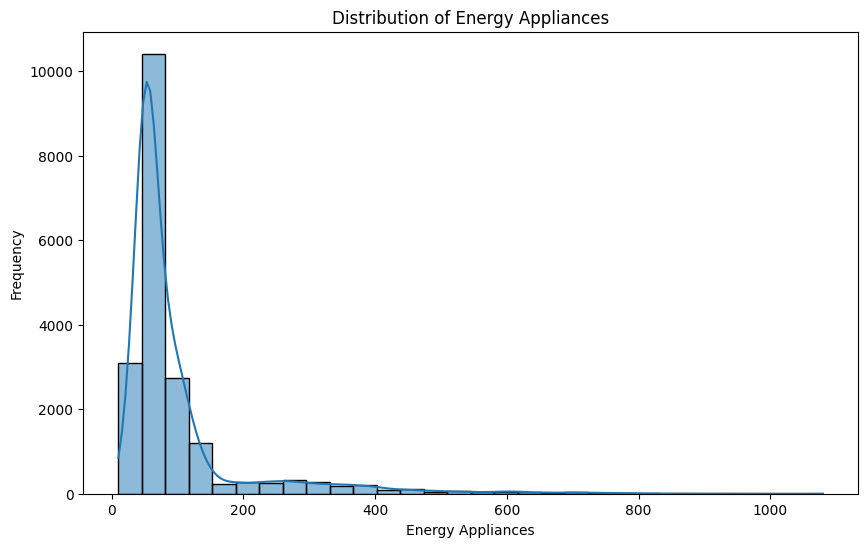

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['energy_appliances'], bins=30, kde=True)
plt.title('Distribution of Energy Appliances')
plt.xlabel('Energy Appliances')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Pair plot
#sns.pairplot(df[numerical_cols], diag_kind='kde')
#plt.show()

In [ ]:
''''
# Plot distributions of features
features = df.columns.drop('energy_appliances')
fig, axes = plt.subplots(nrows=len(features)//3, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
'''

"'\n# Plot distributions of features\nfeatures = df.columns.drop('energy_appliances')\nfig, axes = plt.subplots(nrows=len(features)//3, ncols=3, figsize=(15, 20))\naxes = axes.flatten()\n\nfor i, feature in enumerate(features):\n    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])\n    axes[i].set_title(f'Distribution of {feature}')\n\nplt.tight_layout()\nplt.show()\n"

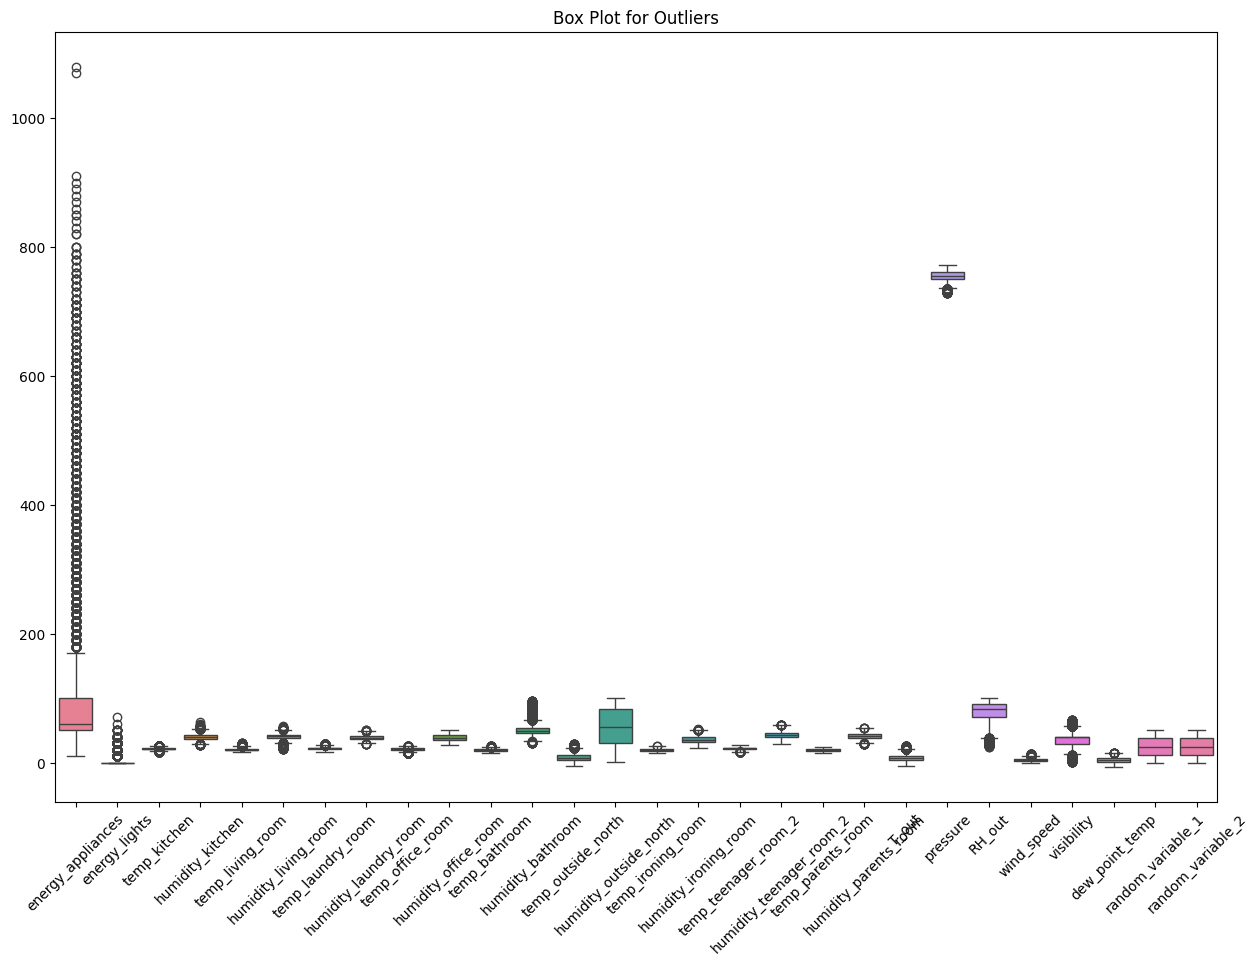

In [ ]:
# Box plots for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot for Outliers')
plt.xticks(rotation=45)
plt.show()

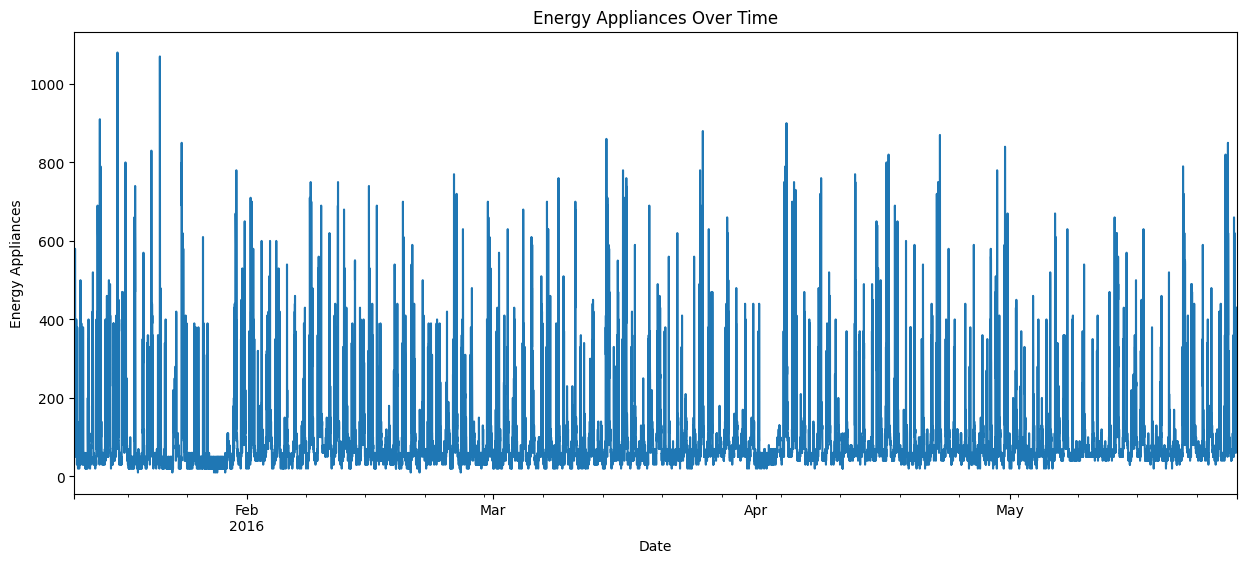

In [ ]:
# Assuming you have a 'date' column
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the date as the index
df_index = df.set_index('timestamp')

# Plot the time series
plt.figure(figsize=(15, 6))
df_index['energy_appliances'].plot()
plt.title('Energy Appliances Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Appliances')
plt.show()

In [ ]:
df_index.columns

Index(['energy_appliances', 'energy_lights', 'temp_kitchen',
       'humidity_kitchen', 'temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'humidity_bathroom',
       'temp_outside_north', 'humidity_outside_north', 'temp_ironing_room',
       'humidity_ironing_room', 'temp_teenager_room_2',
       'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'pressure', 'RH_out', 'wind_speed',
       'visibility', 'dew_point_temp', 'random_variable_1',
       'random_variable_2'],
      dtype='object')

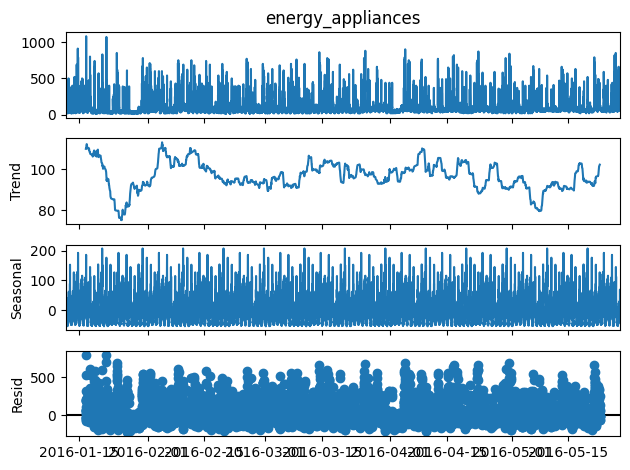

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Check if 'timestamp' column exists. If not, create it from an existing date column if available.
if 'timestamp' not in df.columns:
    if 'date' in df.columns:  # Assuming you have a 'date' column
        df['timestamp'] = pd.to_datetime(df['date'])
    else:
        raise ValueError("Error: 'timestamp' column not found and no 'date' column to create it from.")

# Ensure the 'timestamp' column is of datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Infer the frequency of the time series and handle the error if frequency is not recognized
try:
    df = df.asfreq(pd.infer_freq(df.index))
except ValueError as e:
    print(f"Warning: {e}. Setting frequency to 'T' (minute-level).")
    df = df.asfreq('T')

# Perform seasonal decomposition
result = seasonal_decompose(df['energy_appliances'], model='additive', period=1440)  # Assuming daily seasonality with minute-level data

# Plot the decomposition
result.plot()
plt.show()

# Train-Test Splitting

In [ ]:
'''
from sklearn.model_selection import train_test_split

X = df.drop('energy_appliances', axis=1)  # Features
y = df['energy_appliances']  # Target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
'''

# Feature Engineering and Feature Selection

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numericals = df[numerical_cols]
df_numericals

,energy_appliances,energy_lights,temp_kitchen,humidity_kitchen,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,humidity_office_room,...,temp_parents_room,humidity_parents_room,T_out,pressure,RH_out,wind_speed,visibility,dew_point_temp,random_variable_1,random_variable_2
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [ ]:
correlation_matrix = df_numericals.corr()
correlation_matrix

,energy_appliances,energy_lights,temp_kitchen,humidity_kitchen,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,humidity_office_room,...,temp_parents_room,humidity_parents_room,T_out,pressure,RH_out,wind_speed,visibility,dew_point_temp,random_variable_1,random_variable_2
energy_appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
energy_lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
temp_kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
humidity_kitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
temp_living_room,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
humidity_living_room,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
temp_laundry_room,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
humidity_laundry_room,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
temp_office_room,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
humidity_office_room,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


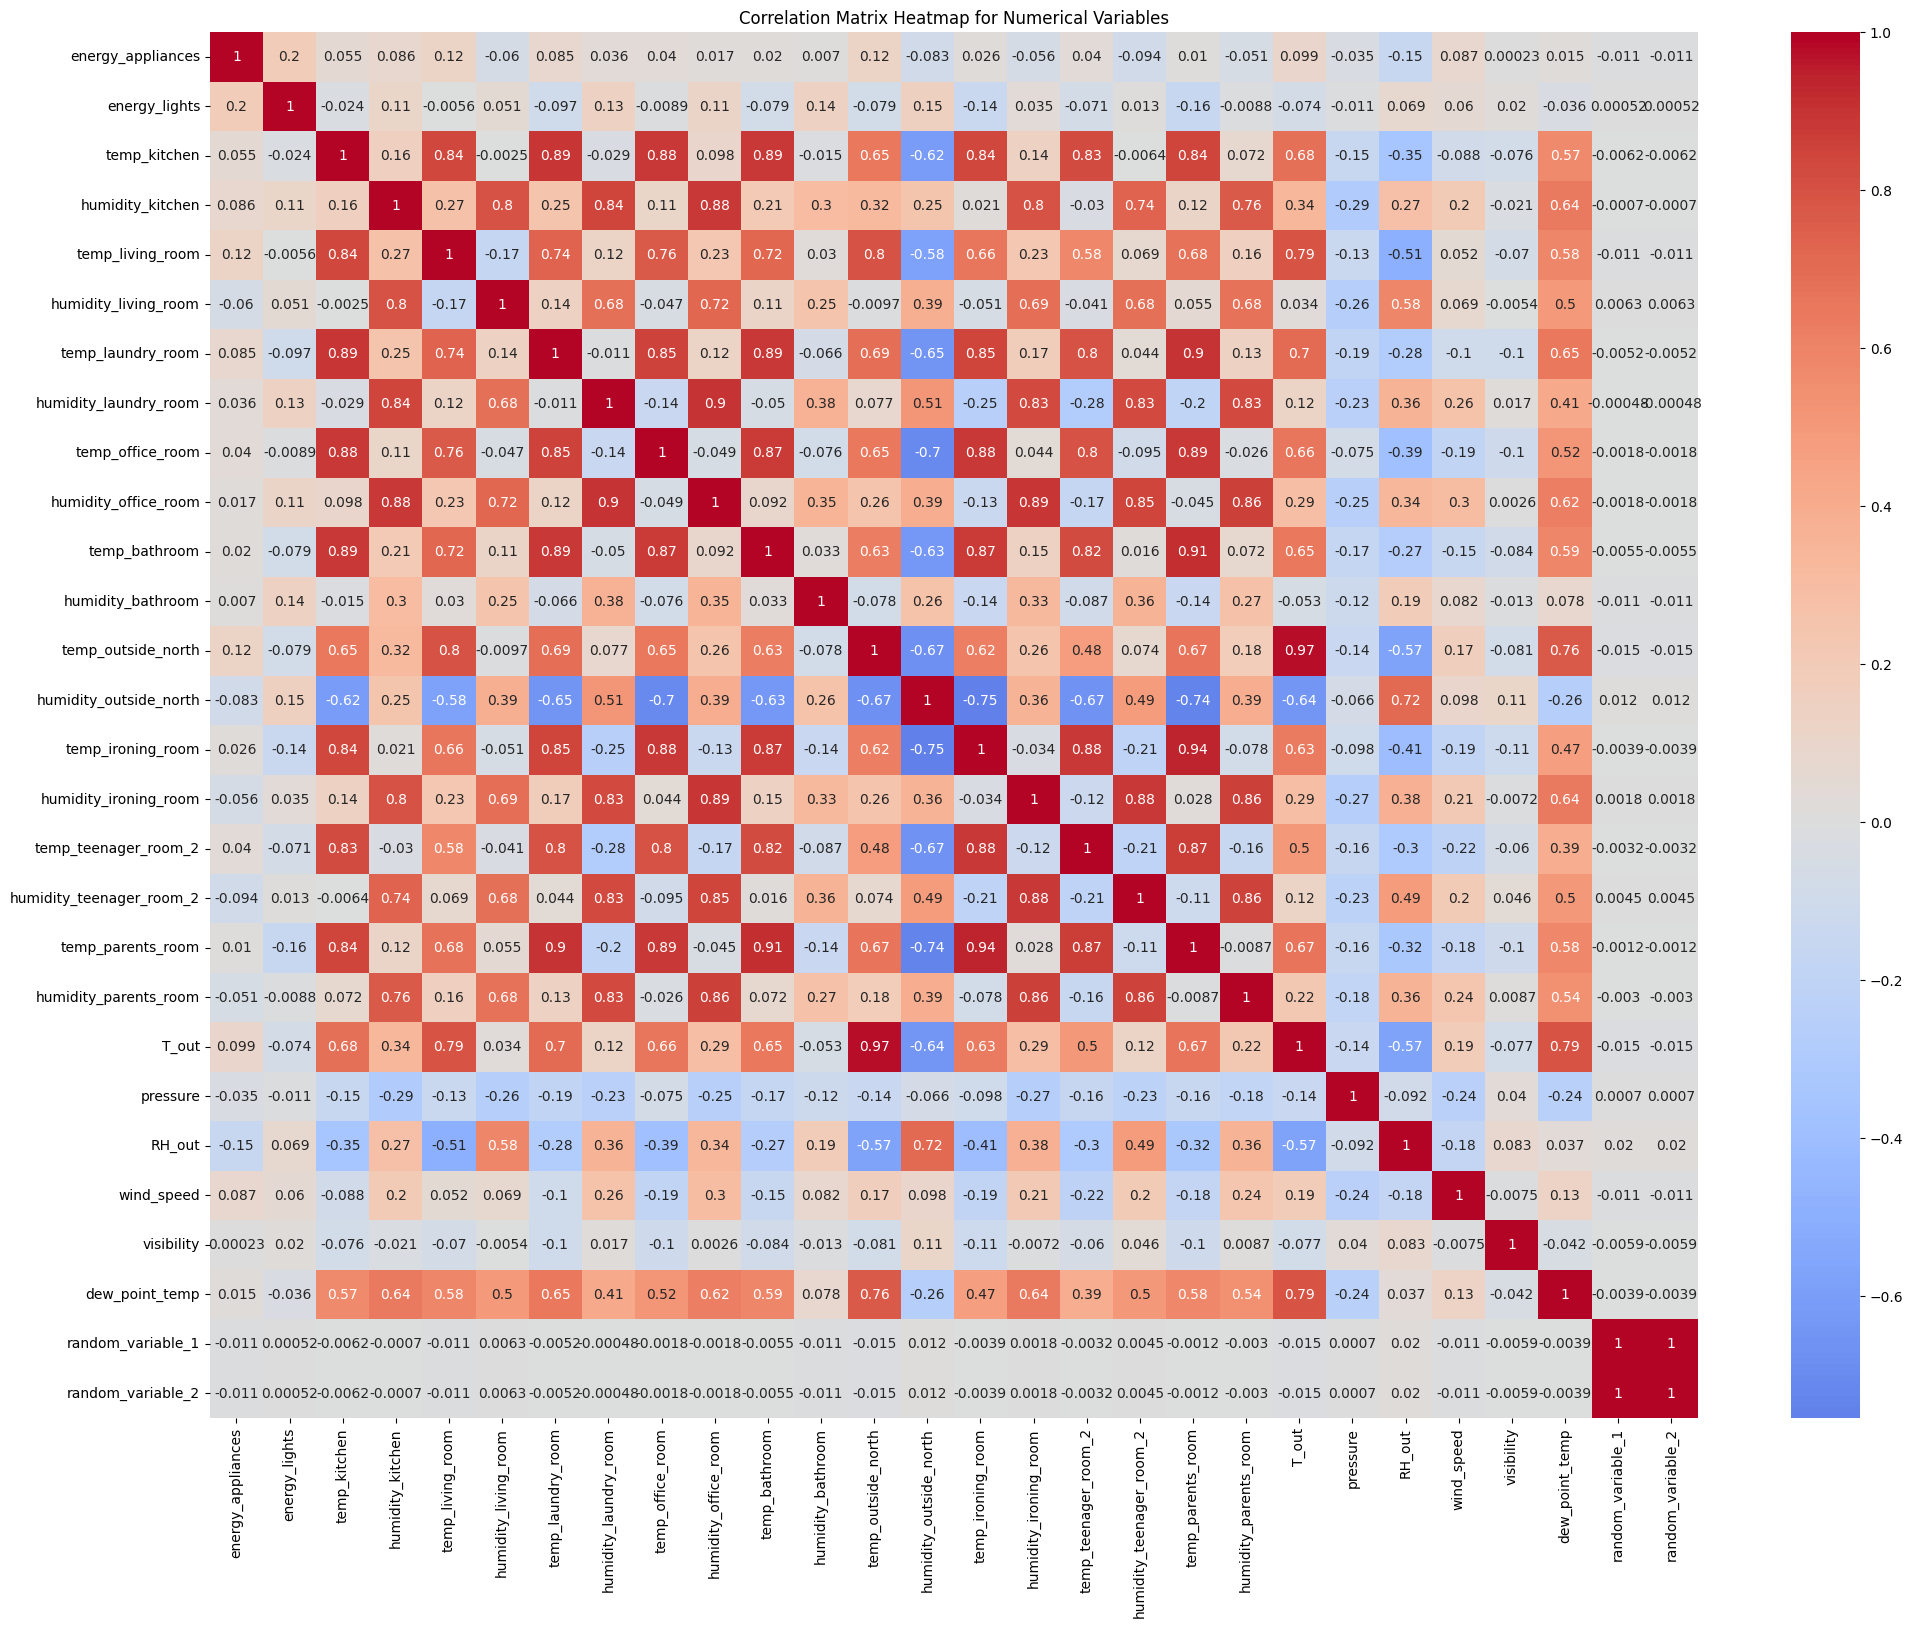

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

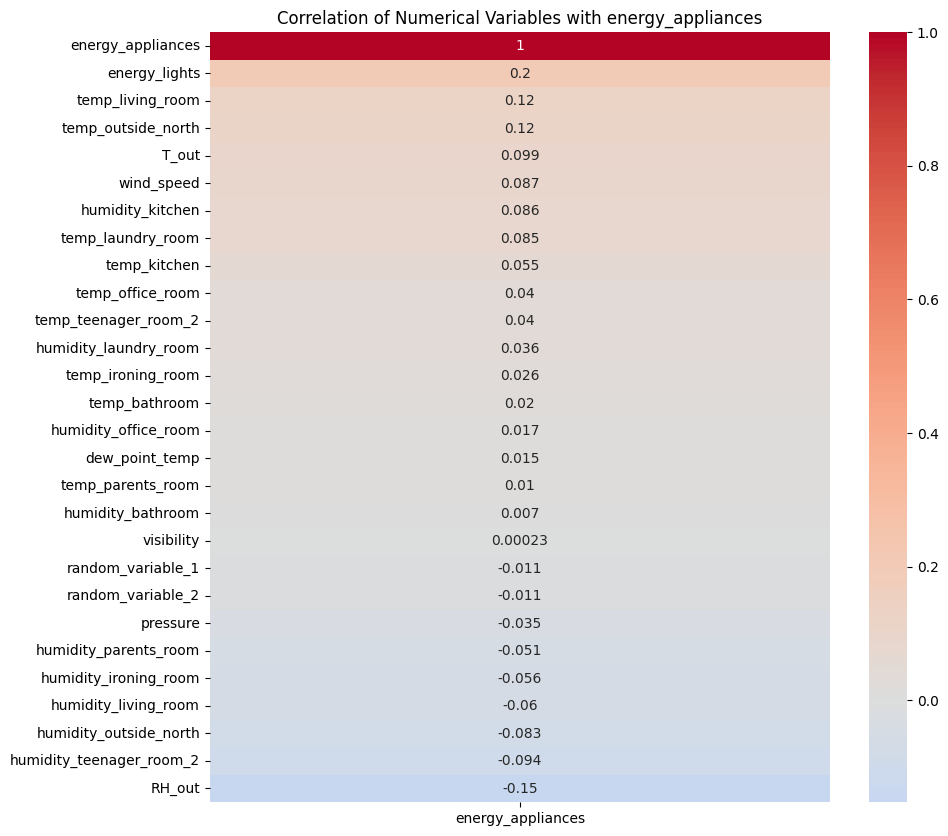

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['energy_appliances']].sort_values(by='energy_appliances', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Numerical Variables with energy_appliances')
plt.show()

In [ ]:
# Get the correlations with the 'energy_appliances' column
appliances_corr = correlation_matrix['energy_appliances']
appliances_corr

energy_appliances           1.000000
energy_lights               0.197278
temp_kitchen                0.055447
humidity_kitchen            0.086031
temp_living_room            0.120073
humidity_living_room       -0.060465
temp_laundry_room           0.085060
humidity_laundry_room       0.036292
temp_office_room            0.040281
humidity_office_room        0.016965
temp_bathroom               0.019760
humidity_bathroom           0.006955
temp_outside_north          0.117638
humidity_outside_north     -0.083178
temp_ironing_room           0.025801
humidity_ironing_room      -0.055642
temp_teenager_room_2        0.039572
humidity_teenager_room_2   -0.094039
temp_parents_room           0.010010
humidity_parents_room      -0.051462
T_out                       0.099155
pressure                   -0.034885
RH_out                     -0.152282
wind_speed                  0.087122
visibility                  0.000230
dew_point_temp              0.015353
random_variable_1          -0.011145
r

In [ ]:
#threshold_corr = float(input("Enter the threshold correlation value = "))
threshold_corr = 0.4

# Filter columns having correlation of less than 0.4 with 'energy_appliances'
low_corr_with_appliances = appliances_corr[abs(appliances_corr) < threshold_corr]

low_corr_with_appliances

energy_lights               0.197278
temp_kitchen                0.055447
humidity_kitchen            0.086031
temp_living_room            0.120073
humidity_living_room       -0.060465
temp_laundry_room           0.085060
humidity_laundry_room       0.036292
temp_office_room            0.040281
humidity_office_room        0.016965
temp_bathroom               0.019760
humidity_bathroom           0.006955
temp_outside_north          0.117638
humidity_outside_north     -0.083178
temp_ironing_room           0.025801
humidity_ironing_room      -0.055642
temp_teenager_room_2        0.039572
humidity_teenager_room_2   -0.094039
temp_parents_room           0.010010
humidity_parents_room      -0.051462
T_out                       0.099155
pressure                   -0.034885
RH_out                     -0.152282
wind_speed                  0.087122
visibility                  0.000230
dew_point_temp              0.015353
random_variable_1          -0.011145
random_variable_2          -0.011145
N

In [ ]:
# Create a sub-matrix with these columns
low_corr_matrix = correlation_matrix.loc[low_corr_with_appliances.index, low_corr_with_appliances.index]

low_corr_matrix

,energy_lights,temp_kitchen,humidity_kitchen,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,humidity_office_room,temp_bathroom,...,temp_parents_room,humidity_parents_room,T_out,pressure,RH_out,wind_speed,visibility,dew_point_temp,random_variable_1,random_variable_2
energy_lights,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
temp_kitchen,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
humidity_kitchen,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
temp_living_room,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
humidity_living_room,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
temp_laundry_room,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
humidity_laundry_room,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
temp_office_room,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
humidity_office_room,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
temp_bathroom,-0.078745,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


In [ ]:
# Filter columns that have less than 0.5 correlation amongst them
def check_corr_below_threshold(matrix, threshold=threshold_corr):
    cols = matrix.columns.tolist()
    selected_cols = []

    for col in cols:
        if all(abs(matrix.loc[col, other_col]) < threshold for other_col in selected_cols):
            selected_cols.append(col)

    return selected_cols

In [ ]:
# Get the final columns
final_columns = check_corr_below_threshold(low_corr_matrix)

final_columns

['energy_lights',
 'temp_kitchen',
 'humidity_kitchen',
 'humidity_bathroom',
 'pressure',
 'RH_out',
 'wind_speed',
 'visibility',
 'random_variable_1']

In [ ]:
# Extract correlations of final columns with 'energy_appliences'
final_corr_with_appliances = low_corr_with_appliances[final_columns]

final_corr_with_appliances.sort_values()

RH_out              -0.152282
pressure            -0.034885
random_variable_1   -0.011145
visibility           0.000230
humidity_bathroom    0.006955
temp_kitchen         0.055447
humidity_kitchen     0.086031
wind_speed           0.087122
energy_lights        0.197278
Name: energy_appliances, dtype: float64

In [ ]:
# Print the final column names along with their correlation values with 'popularity'
print("Correlations with 'energy_appliance':")
for col, corr_value in final_corr_with_appliances.items():
    print(f"Column: {col}, \n\tCorrelation with energy_appliance: {corr_value}")

Correlations with 'energy_appliance':
Column: energy_lights, 
	Correlation with energy_appliance: 0.1972775602062424
Column: temp_kitchen, 
	Correlation with energy_appliance: 0.05544747185203501
Column: humidity_kitchen, 
	Correlation with energy_appliance: 0.08603142531155053
Column: humidity_bathroom, 
	Correlation with energy_appliance: 0.006954536262417769
Column: pressure, 
	Correlation with energy_appliance: -0.03488482908163348
Column: RH_out, 
	Correlation with energy_appliance: -0.15228238090915153
Column: wind_speed, 
	Correlation with energy_appliance: 0.08712210591235872
Column: visibility, 
	Correlation with energy_appliance: 0.00023035785547196032
Column: random_variable_1, 
	Correlation with energy_appliance: -0.011144917533634427


In [ ]:
# Print the correlation values amongst the final columns
print("Correlations amongst selected columns:")
final_corr_matrix = low_corr_matrix.loc[final_columns, final_columns]

final_corr_matrix

Correlations amongst selected columns:


,energy_lights,temp_kitchen,humidity_kitchen,humidity_bathroom,pressure,RH_out,wind_speed,visibility,random_variable_1
energy_lights,1.000000,-0.023528,0.106968,0.141233,-0.010576,0.068543,0.060281,0.020038,0.000521
temp_kitchen,-0.023528,1.000000,0.164006,-0.014782,-0.150574,-0.345481,-0.087654,-0.076210,-0.006203
humidity_kitchen,0.106968,0.164006,1.000000,0.303258,-0.293957,0.274126,0.204932,-0.021057,-0.000699
humidity_bathroom,0.141233,-0.014782,0.303258,1.000000,-0.119327,0.185941,0.082044,-0.013133,-0.011056
pressure,-0.010576,-0.150574,-0.293957,-0.119327,1.000000,-0.092017,-0.235032,0.040315,0.000699
RH_out,0.068543,-0.345481,0.274126,0.185941,-0.092017,1.000000,-0.176458,0.083125,0.020441
wind_speed,0.060281,-0.087654,0.204932,0.082044,-0.235032,-0.176458,1.000000,-0.007516,-0.011342
visibility,0.020038,-0.076210,-0.021057,-0.013133,0.040315,0.083125,-0.007516,1.000000,-0.005889
random_variable_1,0.000521,-0.006203,-0.000699,-0.011056,0.000699,0.020441,-0.011342,-0.005889,1.000000


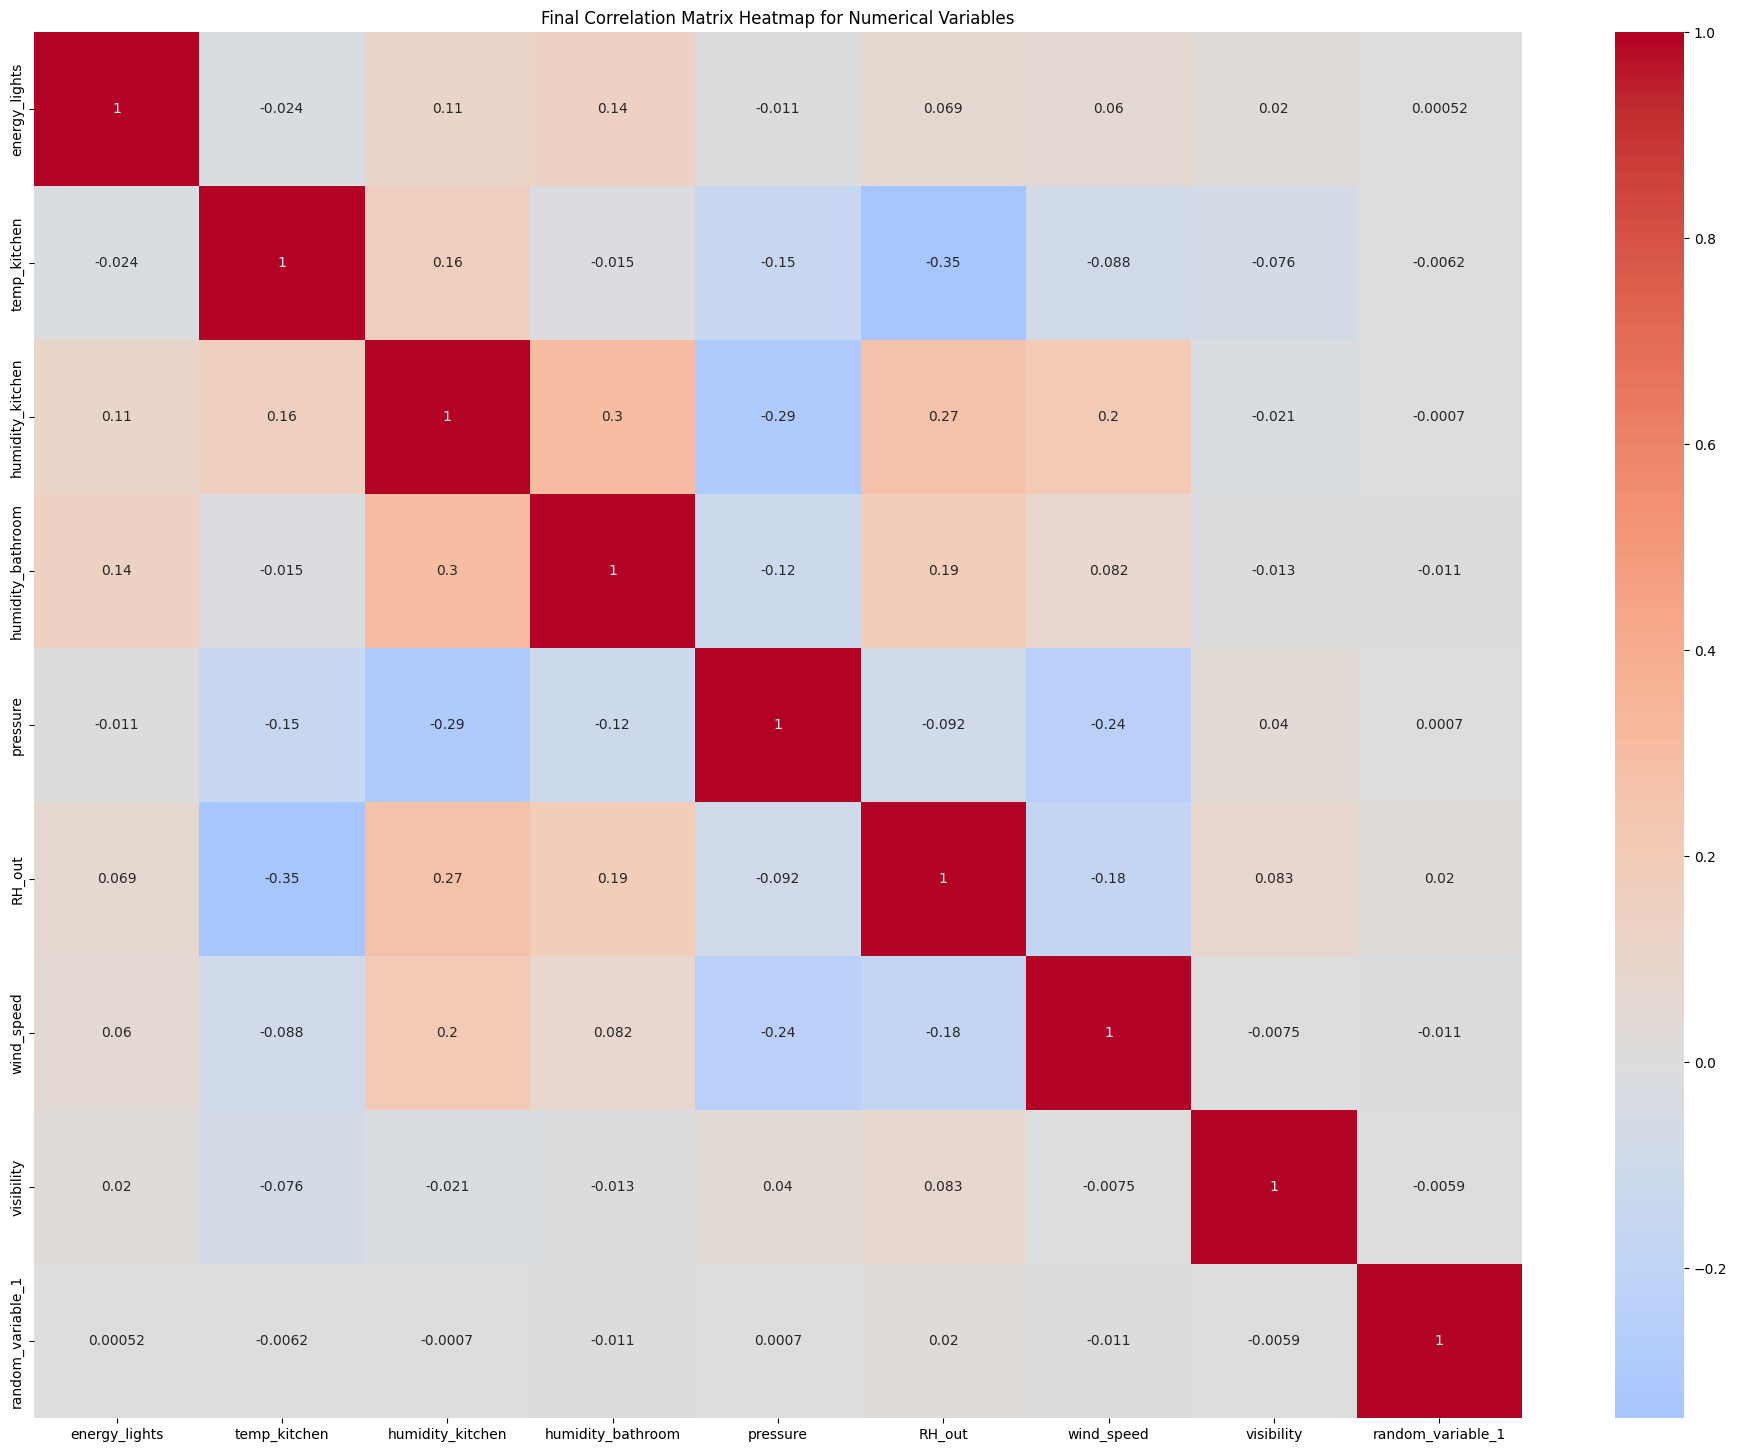

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 18))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Final Correlation Matrix Heatmap for Numerical Variables')
plt.show()

In [ ]:
# List to store correlation values with their respective column pairs
correlations = []

# Iterate through columns and rows
for col in final_corr_matrix.columns:
    for row in final_corr_matrix.index:
        if col != row:
            corr_value = final_corr_matrix.loc[row, col]
            # Append (absolute value of correlation, column pair) to list
            correlations.append((abs(corr_value), row, col))

# Sort correlations based on the absolute value of correlation in descending order
correlations.sort(reverse=True)

In [ ]:
# Print sorted correlations
print("\nCorrelations sorted from higher to lower:")
for abs_corr, row, col in correlations:
    corr_value = final_corr_matrix.loc[row, col]
    print(f"{row} and {col}: {corr_value}")


Correlations sorted from higher to lower:
temp_kitchen and RH_out: -0.3454814775151725
RH_out and temp_kitchen: -0.3454814775151725
humidity_kitchen and humidity_bathroom: 0.30325825102791265
humidity_bathroom and humidity_kitchen: 0.30325825102791265
pressure and humidity_kitchen: -0.2939568613605731
humidity_kitchen and pressure: -0.2939568613605731
humidity_kitchen and RH_out: 0.27412601315756496
RH_out and humidity_kitchen: 0.27412601315756496
wind_speed and pressure: -0.23503225756072105
pressure and wind_speed: -0.23503225756072105
wind_speed and humidity_kitchen: 0.20493248567510966
humidity_kitchen and wind_speed: 0.20493248567510966
humidity_bathroom and RH_out: 0.18594102550216215
RH_out and humidity_bathroom: 0.18594102550216215
wind_speed and RH_out: -0.17645833415525058
RH_out and wind_speed: -0.17645833415525058
temp_kitchen and humidity_kitchen: 0.16400578895208826
humidity_kitchen and temp_kitchen: 0.16400578895208826
temp_kitchen and pressure: -0.1505744533887912
pres

In [ ]:
final_columns.append('energy_appliances')
final_columns

['energy_lights',
 'temp_kitchen',
 'humidity_kitchen',
 'humidity_bathroom',
 'pressure',
 'RH_out',
 'wind_speed',
 'visibility',
 'random_variable_1',
 'energy_appliances']

In [ ]:
df_final = df[final_columns]
df_final.head()

,energy_lights,temp_kitchen,humidity_kitchen,humidity_bathroom,pressure,RH_out,wind_speed,visibility,random_variable_1,energy_appliances
timestamp,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,55.20,733.5,92.0,7.000000,63.000000,13.275433,60
2016-01-11 17:10:00,30,19.89,46.693333,55.20,733.6,92.0,6.666667,59.166667,18.606195,60
2016-01-11 17:20:00,30,19.89,46.300000,55.09,733.7,92.0,6.333333,55.333333,28.642668,50
2016-01-11 17:30:00,40,19.89,46.066667,55.09,733.8,92.0,6.000000,51.500000,45.410389,50
2016-01-11 17:40:00,40,19.89,46.333333,55.09,733.9,92.0,5.666667,47.666667,10.084097,60


In [ ]:
df1 = df.drop(columns=['energy_lights',
 'temp_kitchen',
 'humidity_kitchen',
 'humidity_bathroom',
 'pressure',
 'RH_out',
 'wind_speed',
 'visibility',
 'random_variable_1'])

In [ ]:
df1.columns

Index(['energy_appliances', 'temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'temp_outside_north',
       'humidity_outside_north', 'temp_ironing_room', 'humidity_ironing_room',
       'temp_teenager_room_2', 'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'dew_point_temp',
       'random_variable_2'],
      dtype='object')

In [ ]:
num_cols = df1

In [ ]:
# Select the columns you want to include in the PCA
columns_for_pca = df1.drop(columns=['energy_appliances'])
columns_for_pca

,temp_living_room,humidity_living_room,temp_laundry_room,humidity_laundry_room,temp_office_room,humidity_office_room,temp_bathroom,temp_outside_north,humidity_outside_north,temp_ironing_room,humidity_ironing_room,temp_teenager_room_2,humidity_teenager_room_2,temp_parents_room,humidity_parents_room,T_out,dew_point_temp,random_variable_2
timestamp,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,5.300000,13.275433
2016-01-11 17:10:00,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,5.200000,18.606195
2016-01-11 17:20:00,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,5.100000,28.642668
2016-01-11 17:30:00,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,5.000000,45.410389
2016-01-11 17:40:00,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,4.900000,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,13.333333,43.096812
2016-05-27 17:30:00,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,13.300000,49.282940
2016-05-27 17:40:00,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,13.266667,29.199117


In [ ]:
df = df.drop(columns=df1.columns, axis=1)
df.head()

,energy_lights,temp_kitchen,humidity_kitchen,humidity_bathroom,pressure,RH_out,wind_speed,visibility,random_variable_1
timestamp,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,55.20,733.5,92.0,7.000000,63.000000,13.275433
2016-01-11 17:10:00,30,19.89,46.693333,55.20,733.6,92.0,6.666667,59.166667,18.606195
2016-01-11 17:20:00,30,19.89,46.300000,55.09,733.7,92.0,6.333333,55.333333,28.642668
2016-01-11 17:30:00,40,19.89,46.066667,55.09,733.8,92.0,6.000000,51.500000,45.410389
2016-01-11 17:40:00,40,19.89,46.333333,55.09,733.9,92.0,5.666667,47.666667,10.084097


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Extract the data for the selected columns
data_for_pca = df1[columns_for_pca.columns]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA(n_components=5)  # Specify the number of principal components
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the principal components
print("\nPrincipal components:")
print(principal_df)

Explained variance ratio: [0.45413065 0.32020588 0.06403208 0.05544943 0.03024084]

Principal components:
            PC1       PC2       PC3       PC4       PC5
0     -2.722452  3.658918  1.161464 -0.692281 -0.396352
1     -2.734991  3.683809  1.107674 -0.328483 -0.362820
2     -2.782022  3.647975  1.027762  0.358699 -0.336855
3     -2.842073  3.612246  0.906313  1.508824 -0.328177
4     -2.849818  3.583209  1.146230 -0.916233 -0.286759
...         ...       ...       ...       ...       ...
19730  7.338445  2.602240  1.008275  1.392424  0.053434
19731  7.282013  2.573146  0.881505  1.807199  0.044377
19732  7.219533  2.675484  0.911456  0.415523 -0.001754
19733  7.088055  2.625687  0.958304 -1.167380 -0.066071
19734  6.983762  2.600450  0.609461  0.722769 -0.036863

[19735 rows x 5 columns]


In [ ]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.722452,3.658918,1.161464,-0.692281,-0.396352
1,-2.734991,3.683809,1.107674,-0.328483,-0.362820
2,-2.782022,3.647975,1.027762,0.358699,-0.336855
3,-2.842073,3.612246,0.906313,1.508824,-0.328177
4,-2.849818,3.583209,1.146230,-0.916233,-0.286759


In [ ]:
principal_df.shape

(19735, 5)

In [ ]:
principal_df.isnull().sum().sort_values()

PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
dtype: int64

In [ ]:
df.isnull().sum().sort_values()

timestamp                   0
dew_point_temp              0
visibility                  0
wind_speed                  0
RH_out                      0
pressure                    0
T_out                       0
humidity_parents_room       0
temp_parents_room           0
humidity_teenager_room_2    0
temp_teenager_room_2        0
humidity_ironing_room       0
temp_ironing_room           0
random_variable_1           0
humidity_outside_north      0
humidity_bathroom           0
temp_bathroom               0
humidity_office_room        0
temp_office_room            0
humidity_laundry_room       0
temp_laundry_room           0
humidity_living_room        0
temp_living_room            0
humidity_kitchen            0
temp_kitchen                0
energy_lights               0
energy_appliances           0
temp_outside_north          0
random_variable_2           0
dtype: int64

In [ ]:
df.columns

Index(['timestamp', 'energy_appliances', 'energy_lights', 'temp_kitchen',
       'humidity_kitchen', 'temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'humidity_bathroom',
       'temp_outside_north', 'humidity_outside_north', 'temp_ironing_room',
       'humidity_ironing_room', 'temp_teenager_room_2',
       'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'pressure', 'RH_out', 'wind_speed',
       'visibility', 'dew_point_temp', 'random_variable_1',
       'random_variable_2'],
      dtype='object')

In [ ]:
df.shape

(19735, 29)

In [ ]:
df2 = pd.concat([df, principal_df], axis=1)
df2.head()

NameError: name 'principal_df' is not defined

In [ ]:
#df2 = df.drop(columns=columns_for_pca)

KeyError: "['temp_living_room', 'humidity_living_room', 'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room', 'humidity_office_room', 'temp_bathroom', 'temp_outside_north', 'humidity_outside_north', 'temp_ironing_room', 'humidity_ironing_room', 'temp_teenager_room_2', 'humidity_teenager_room_2', 'temp_parents_room', 'humidity_parents_room', 'T_out', 'dew_point_temp', 'random_variable_2'] not found in axis"

In [ ]:
df2.columns

NameError: name 'df2' is not defined

In [ ]:
df2.shape

(39470, 14)

In [ ]:
df_target = df1.drop(columns=['temp_living_room', 'humidity_living_room',
       'temp_laundry_room', 'humidity_laundry_room', 'temp_office_room',
       'humidity_office_room', 'temp_bathroom', 'temp_outside_north',
       'humidity_outside_north', 'temp_ironing_room', 'humidity_ironing_room',
       'temp_teenager_room_2', 'humidity_teenager_room_2', 'temp_parents_room',
       'humidity_parents_room', 'T_out', 'dew_point_temp', 'random_variable_2'])

In [ ]:
# Optionally, concatenate with the original dataframe
df2 = pd.concat([df_target, principal_df], axis=1)
df2.head()

,energy_appliances,PC1,PC2,PC3,PC4,PC5
2016-01-11 17:00:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:10:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:20:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:30:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:40:00,60.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.shape

(39470, 6)

In [ ]:
df2.columns

Index(['energy_appliances', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

In [ ]:
df2.head()

,energy_appliances,PC1,PC2,PC3,PC4,PC5
2016-01-11 17:00:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:10:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:20:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:30:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:40:00,60.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_multivariate = df2.copy()

In [ ]:
df_multivariate.head()

,energy_appliances,PC1,PC2,PC3,PC4,PC5
2016-01-11 17:00:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:10:00,60.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:20:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:30:00,50.0,NaN,NaN,NaN,NaN,NaN
2016-01-11 17:40:00,60.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_multivariate.isnull().sum().sort_values()

energy_appliances    19735
PC1                  19735
PC2                  19735
PC3                  19735
PC4                  19735
PC5                  19735
dtype: int64

##Feature engineering

In [ ]:

'''# Extracting date and time features
df['date'] = pd.to_datetime(df['timestamp'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute'''

"# Extracting date and time features\ndf['date'] = pd.to_datetime(df['timestamp'])\ndf['year'] = df['date'].dt.year\ndf['month'] = df['date'].dt.month\ndf['day'] = df['date'].dt.day\ndf['hour'] = df['date'].dt.hour\ndf['minute'] = df['date'].dt.minute"

In [ ]:
'''
# Drop original date column
df.drop(['date'], axis=1, inplace=True)
'''

In [ ]:
'''
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['energy_appliances'], axis=1))
'''

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df_final.drop(['energy_appliances'], axis=1)
y = df_final['energy_appliances']
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_final.head()

,energy_lights,temp_kitchen,humidity_kitchen,humidity_bathroom,pressure,RH_out,wind_speed,visibility,random_variable_1,energy_appliances
timestamp,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,55.20,733.5,92.0,7.000000,63.000000,13.275433,60
2016-01-11 17:10:00,30,19.89,46.693333,55.20,733.6,92.0,6.666667,59.166667,18.606195,60
2016-01-11 17:20:00,30,19.89,46.300000,55.09,733.7,92.0,6.333333,55.333333,28.642668,50
2016-01-11 17:30:00,40,19.89,46.066667,55.09,733.8,92.0,6.000000,51.500000,45.410389,50
2016-01-11 17:40:00,40,19.89,46.333333,55.09,733.9,92.0,5.666667,47.666667,10.084097,60


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['energy_appliances'], axis=1)
y = df['energy_appliances']
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.12827401 0.14297751 0.16153288 0.14061015 0.16249067]
Mean cross-validation score: 0.14717704634788703


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Predictions
#y_pred_lr = lr.predict(X_test)
#y_pred_rf = rf.predict(X_test)
'''
# Evaluation Metrics
print('Linear Regression:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'R^2: {r2_score(y_test, y_pred_lr)}')
'''
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('\nRandom Forest Regressor:')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R^2: {r2_score(y_test, y_pred_rf)}')


Random Forest Regressor:
MAE: 0.2615243590229693
MSE: 0.1566855059626995
R^2: 0.6341016002689459


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Update your train-test split with new features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade optuna optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Function to define the objective for Optuna
def objective(trial):
    # Define the parameter space
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    # Define the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    return -mse

In [ ]:
# Create the study and optimize it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

[I 2024-07-24 06:19:02,986] A new study created in memory with name: no-name-46d1ae95-0966-460b-ac7e-e3706d82e78a
[I 2024-07-24 06:21:15,979] Trial 0 finished with value: 0.19466224518714584 and parameters: {'n_estimators': 216, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.19466224518714584.
[I 2024-07-24 06:24:05,629] Trial 1 finished with value: 0.19665913687032927 and parameters: {'n_estimators': 281, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.19466224518714584.
[I 2024-07-24 06:25:19,007] Trial 0 finished with value: 0.19696198994235578 and parameters: {'n_estimators': 157, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.19696198994235578.
[I 2024-07-24 06:26:11,446] Trial 1 finished with value: -0.1973196616895687 and parameters: {'n_estimators': 185, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 1 wit

In [ ]:
# Get the best trial
best_trial = study.best_trial

print(f'Best Parameters: {best_trial.params}')

Best Parameters: {'n_estimators': 241, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
# Evaluate the best model
best_params = best_trial.params
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fit the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.16263716192921984
R² Score: 0.6202030499179134


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming rf is instantiated as a RandomForestRegressor
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {-grid_search.best_score_}')

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming rf is instantiated as a RandomForestRegressor
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print best parameters and best cross-validation score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score (MSE): {-grid_search.best_score_}')

# Evaluate on test data (X_test, y_test) to assess generalization
test_score = grid_search.score(X_test, y_test)
print(f'Model test score (MSE): {-test_score}')  # MSE on test data

In [ ]:
# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')